<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DLS Базовый поток/07. Композиции алгоритмов и выбор модели/HW_7/train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
# YOUR CODE

# посмотрю шапку дата фрейма
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [7]:
data.shape

(5282, 20)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
# есть ли где-то nan
data.isna().any()

ClientPeriod                False
MonthlySpending             False
TotalSpent                  False
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool

Nanов нет поэтому замеенять ничего не нужно

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### 1)

#### Гистограммы для числовых признаков

In [10]:
data[num_cols]

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.2
2,1,75.90,75.9
3,32,79.30,2570
4,60,115.25,6758.45
...,...,...,...
5277,3,30.40,82.15
5278,50,44.45,2188.45
5279,1,55.05,55.05
5280,29,76.00,2215.25


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde3d760290>,
      dtype=object)

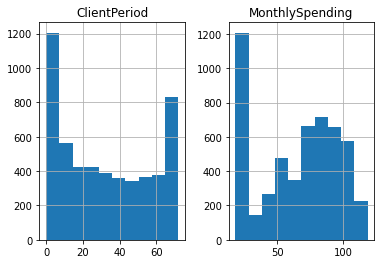

In [11]:
data[num_cols].hist()

Вижу что гистограммы построились только на 2х столбцах, с 3м что- то не так. Проверю отдельно эту колонку

In [12]:
data.TotalSpent

0       1026.35
1        1872.2
2          75.9
3          2570
4       6758.45
         ...   
5277      82.15
5278    2188.45
5279      55.05
5280    2215.25
5281     1375.6
Name: TotalSpent, Length: 5282, dtype: object

Тип данных в колонке Object. Из доки pandas: Columns with mixed types are stored with the object dtype

In [13]:
data.TotalSpent.dtypes

dtype('O')

Оказывается тут не числа а строки

In [14]:
data['TotalSpent'].apply(lambda x: isinstance(x, str))

0       True
1       True
2       True
3       True
4       True
        ... 
5277    True
5278    True
5279    True
5280    True
5281    True
Name: TotalSpent, Length: 5282, dtype: bool

Поменяю тип данных в этой колонке

In [15]:
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors= 'coerce') # coerce - 
                  #значит если пандас почему то не может обработать строки то заменит из на NaN

In [16]:
data.TotalSpent.dtypes

dtype('float64')

Где- то есть NaNы

In [17]:
data.TotalSpent.isna().any()

True

Дропну их

In [59]:
data = data.dropna()
data

,level_0,index,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,...,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0,0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,1,1,72,25.85,1872.20,Male,0,Yes,No,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,2,2,1,75.90,75.90,Male,0,No,No,Yes,...,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,3,3,32,79.30,2570.00,Female,1,Yes,No,Yes,...,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,4,4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,5268,5277,3,30.40,82.15,Male,0,No,No,No,...,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5269,5269,5278,50,44.45,2188.45,Male,0,Yes,No,No,...,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5270,5270,5279,1,55.05,55.05,Male,0,No,No,Yes,...,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5271,5271,5280,29,76.00,2215.25,Female,0,No,No,Yes,...,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [60]:
data.shape

(5273, 22)

In [61]:
data.TotalSpent.isna().any()

False

In [37]:
data.TotalSpent.dtypes

dtype('float64')

Теперь построю гистрограммы 3х колонок

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde3a782190>,
      dtype=object)

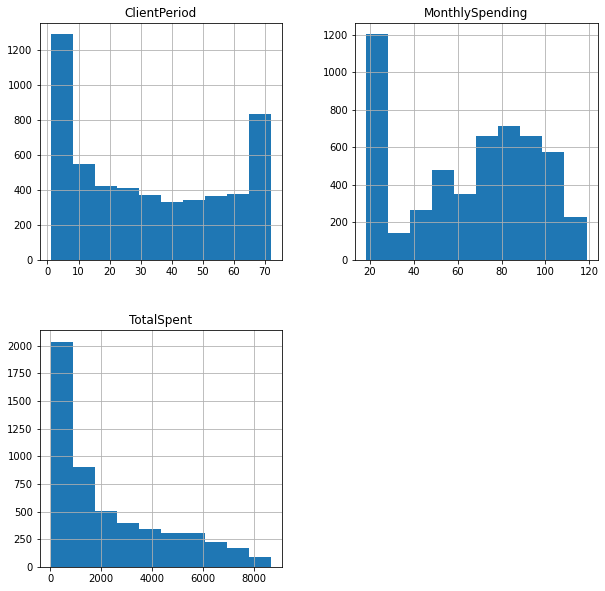

In [62]:
data[num_cols].hist(figsize = (10,10))

#### Категориальные признаки

In [63]:
data[cat_cols]

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5269,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5270,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5271,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [64]:
data[cat_cols].columns

Index(['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'],
      dtype='object')

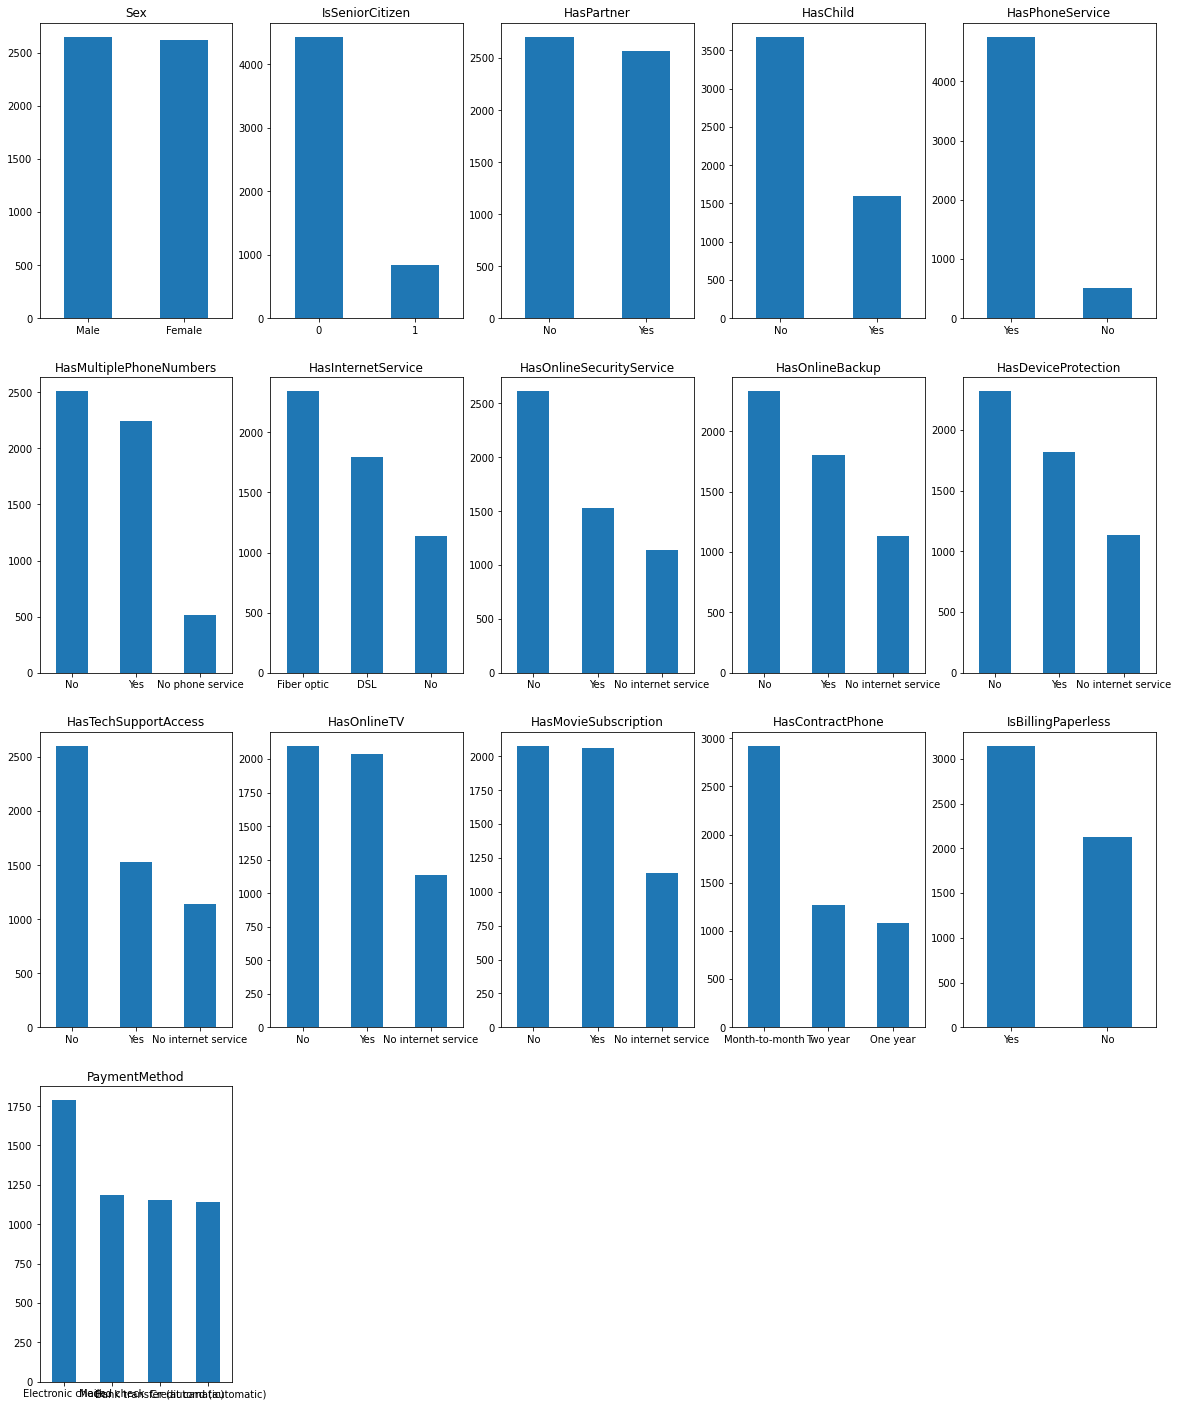

In [41]:
plt.figure(figsize=(20, 25))

# Названия колонок
cols = data[cat_cols].columns

# set number of columns (use 3 to demonstrate the change)
ncols = 5

# calculate number of rows
nrows = len(cols) // ncols + (len(cols) % ncols > 0)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(cols):
    # add a new subplot iteratively using nrows and cols
    ax = plt.subplot(nrows, ncols, n + 1)

    # filter df and plot ticker on the new subplot axis
    data[cols[n]].value_counts().plot(kind ='bar', ax=ax, label = data[cols[n]].name, title = data[cols[n]].name, rot = 0)


### 2)

Целевая переменная несбалансирована, 0го класса примерно в 2 раза больше чем 1го класса

In [42]:
data[target_col].value_counts()

0    3889
1    1384
Name: Churn, dtype: int64

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [27]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

### 1) Подготовка данных к Logreg

#### Нормирование числовых признаков

In [65]:
# YOUR CODE
scaler = StandardScaler()

num_cols_scaled = scaler.fit_transform(data[num_cols])
num_cols_scaled

array([[ 0.91909879, -1.50643567, -0.55758153],
       [ 1.61206004, -1.29599691, -0.18476315],
       [-1.28207223,  0.36265822, -0.9765036 ],
       ...,
       [-1.28207223, -0.32831   , -0.98569348],
       [-0.1407243 ,  0.36597222, -0.03355981],
       [-0.54834856,  0.36265822, -0.40364547]])

In [66]:
num_data_scaled = pd.DataFrame(data = num_cols_scaled, columns = num_cols)
num_data_scaled

,ClientPeriod,MonthlySpending,TotalSpent
0,0.919099,-1.506436,-0.557582
1,1.612060,-1.295997,-0.184763
2,-1.282072,0.362658,-0.976504
3,-0.018437,0.475334,0.122800
4,1.122911,1.666716,1.968909
...,...,...,...
5268,-1.200547,-1.145210,-0.973749
5269,0.715287,-0.679594,-0.045372
5270,-1.282072,-0.328310,-0.985693
5271,-0.140724,0.365972,-0.033560


In [67]:
num_data_scaled.shape

(5273, 3)

#### OneHot категориальных

In [69]:
ohe_cat_cols = pd.get_dummies(data[cat_cols])
ohe_cat_cols

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,1,1,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
5269,0,0,1,0,1,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
5270,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
5271,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [70]:
ohe_cat_cols.shape

(5273, 42)

Конкатенируем в новый датафрейм

In [72]:
X = pd.concat([num_data_scaled, ohe_cat_cols], axis = 1)
X

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.919099,-1.506436,-0.557582,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.612060,-1.295997,-0.184763,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.282072,0.362658,-0.976504,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.018437,0.475334,0.122800,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,1.122911,1.666716,1.968909,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,-1.200547,-1.145210,-0.973749,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5269,0.715287,-0.679594,-0.045372,0,0,1,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
5270,-1.282072,-0.328310,-0.985693,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5271,-0.140724,0.365972,-0.033560,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [74]:
y = data[target_col]
y

0       0
1       0
2       1
3       0
4       0
       ..
5268    0
5269    0
5270    0
5271    0
5272    0
Name: Churn, Length: 5273, dtype: int64

### 2)GridSearch

С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

In [79]:
estimator = LogisticRegression()

In [81]:
parameters = { 'C' : [0.001,0.01,0.1,1,10,100]}

CV_model = GridSearchCV(estimator=estimator, 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=3)
CV_model.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc', verbose=3)

In [83]:
CV_model.best_estimator_

LogisticRegression(C=100)

In [84]:
CV_model.best_score_

0.8448181101278219

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество получилось равным 0.8448181101278219 при С = 100

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

#### Разделю на Train / Test датасет который без onehote и normalize

Установка и импорт Catboost

In [89]:
!pip install catboost

from catboost import CatBoostClassifier# документация: https://catboost.ai/docs


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [146]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col].values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [160]:
cat = CatBoostClassifier(cat_features=cat_cols)


In [161]:
cat.fit(X_train, y_train)

Learning rate set to 0.019048
0:	learn: 0.6801499	total: 10.8ms	remaining: 10.8s
1:	learn: 0.6683861	total: 20.1ms	remaining: 10s
2:	learn: 0.6574055	total: 27.8ms	remaining: 9.23s
3:	learn: 0.6459140	total: 37.7ms	remaining: 9.38s
4:	learn: 0.6353605	total: 51.5ms	remaining: 10.2s
5:	learn: 0.6261610	total: 59.6ms	remaining: 9.87s
6:	learn: 0.6167841	total: 68.4ms	remaining: 9.7s
7:	learn: 0.6080311	total: 77.1ms	remaining: 9.56s
8:	learn: 0.5997483	total: 86.6ms	remaining: 9.54s
9:	learn: 0.5918432	total: 96.3ms	remaining: 9.54s
10:	learn: 0.5839242	total: 106ms	remaining: 9.52s
11:	learn: 0.5766678	total: 115ms	remaining: 9.48s
12:	learn: 0.5701751	total: 121ms	remaining: 9.22s
13:	learn: 0.5631203	total: 131ms	remaining: 9.25s
14:	learn: 0.5566815	total: 140ms	remaining: 9.19s
15:	learn: 0.5507060	total: 149ms	remaining: 9.17s
16:	learn: 0.5449043	total: 165ms	remaining: 9.54s
17:	learn: 0.5390888	total: 174ms	remaining: 9.5s
18:	learn: 0.5338561	total: 184ms	remaining: 9.5s
19:	le

In [162]:
y_train_predicted = cat.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_train_predicted)

0.8934524745969756

In [163]:
y_test_predicted = cat.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_test_predicted)

0.8404411417787214

#### Gridsearch + Catboost

In [219]:
cat = CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC:hints=skip_train~false')

params = {'learning_rate': np.arange(0.001,0.015,0.001),
          'iterations' : np.arange(700,1200,100)}

cat_gs = cat.grid_search(params, data[feature_cols], data[target_col], refit=True)

Streaming output truncated to the last 5000 lines.
431:	learn: 0.8708556	test: 0.8636031	best: 0.8641241 (311)	total: 4.95s	remaining: 7.65s
432:	learn: 0.8708611	test: 0.8635834	best: 0.8641241 (311)	total: 4.95s	remaining: 7.63s
433:	learn: 0.8709195	test: 0.8635834	best: 0.8641241 (311)	total: 4.96s	remaining: 7.62s
434:	learn: 0.8709221	test: 0.8636277	best: 0.8641241 (311)	total: 4.97s	remaining: 7.61s
435:	learn: 0.8709643	test: 0.8636915	best: 0.8641241 (311)	total: 4.99s	remaining: 7.59s
436:	learn: 0.8710001	test: 0.8636965	best: 0.8641241 (311)	total: 5s	remaining: 7.59s
437:	learn: 0.8710001	test: 0.8636965	best: 0.8641241 (311)	total: 5s	remaining: 7.56s
438:	learn: 0.8710600	test: 0.8637505	best: 0.8641241 (311)	total: 5.01s	remaining: 7.55s
439:	learn: 0.8711477	test: 0.8637260	best: 0.8641241 (311)	total: 5.03s	remaining: 7.54s
440:	learn: 0.8711826	test: 0.8637653	best: 0.8641241 (311)	total: 5.04s	remaining: 7.53s
441:	learn: 0.8712107	test: 0.8637309	best: 0.8641241 (

In [220]:
cat_gs['params']

{'iterations': 700, 'learning_rate': 0.010000000000000002}

In [221]:
cat_cv_results = pd.DataFrame(cat_gs['cv_results'])
cat_cv_results

,iterations,test-AUC-mean,test-AUC-std,train-AUC-mean,train-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.797585,0.024369,0.813962,0.004638,0.686754,0.000148,0.686593,0.000107
1,1,0.800141,0.021021,0.814072,0.005659,0.681551,0.000212,0.681276,0.000499
2,2,0.806685,0.027147,0.821816,0.003243,0.675653,0.000203,0.675249,0.000603
3,3,0.808758,0.025951,0.824652,0.006625,0.670341,0.000194,0.669789,0.001014
4,4,0.811764,0.028962,0.827362,0.002859,0.664863,0.000879,0.664244,0.000786
...,...,...,...,...,...,...,...,...,...
695,695,0.845931,0.014111,0.884257,0.001980,0.412762,0.014526,0.370071,0.003381
696,696,0.845927,0.014099,0.884292,0.001974,0.412773,0.014515,0.370026,0.003379
697,697,0.845909,0.014105,0.884392,0.001962,0.412785,0.014510,0.369911,0.003375
698,698,0.845912,0.014099,0.884427,0.001975,0.412776,0.014494,0.369869,0.003396


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

0.8924654467970905

In [222]:
cat.get_best_score()

{'learn': {'Logloss': 0.3825079410346663, 'AUC': 0.8729864840360465}}

In [223]:
cat.get_params()

{'eval_metric': 'AUC:hints=skip_train~false',
 'cat_features': ['Sex',
  'IsSeniorCitizen',
  'HasPartner',
  'HasChild',
  'HasPhoneService',
  'HasMultiplePhoneNumbers',
  'HasInternetService',
  'HasOnlineSecurityService',
  'HasOnlineBackup',
  'HasDeviceProtection',
  'HasTechSupportAccess',
  'HasOnlineTV',
  'HasMovieSubscription',
  'HasContractPhone',
  'IsBillingPaperless',
  'PaymentMethod'],
 'iterations': 700,
 'learning_rate': 0.010000000000000002}

In [224]:
cat.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'AUC:hints=skip_train~false',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 700,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:Ta

# Предсказания

In [225]:
best_model = cat # какая-то предыдущая модель

In [ ]:
# submission['Churn'] =  best_model.predict_proba(X_test)/ best_model.predict(X_test)

In [226]:
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DLS Базовый поток/07. Композиции алгоритмов и выбор модели/HW_7/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DLS Базовый поток/07. Композиции алгоритмов и выбор модели/HW_7/submission.csv')

submission['Churn'] =  best_model.predict_proba(X_test)[:,1]
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/DLS Базовый поток/07. Композиции алгоритмов и выбор модели/HW_7/my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.